In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv(r"C:\Users\cer\OneDrive\Desktop\Pandamic_Unemploment\archive\Unemployment_in_India.csv")

In [5]:
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [6]:
data.columns = [
    "State",
    "Date",
    "Frequency",
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate",
    "Region"
]

In [7]:
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)


In [8]:
print(data.isnull().sum())

State                                  28
Date                                   28
Frequency                              28
Estimated_Unemployment_Rate            28
Estimated_Employed                     28
Estimated_Labour_Participation_Rate    28
Region                                 28
dtype: int64


In [9]:
data=data.dropna()

In [10]:
print(data.describe())

                                Date  Estimated_Unemployment_Rate  \
count                            740                   740.000000   
mean   2019-12-12 18:36:58.378378496                    11.787946   
min              2019-05-31 00:00:00                     0.000000   
25%              2019-08-31 00:00:00                     4.657500   
50%              2019-11-30 00:00:00                     8.350000   
75%              2020-03-31 00:00:00                    15.887500   
max              2020-06-30 00:00:00                    76.740000   
std                              NaN                    10.721298   

       Estimated_Employed  Estimated_Labour_Participation_Rate  
count        7.400000e+02                           740.000000  
mean         7.204460e+06                            42.630122  
min          4.942000e+04                            13.330000  
25%          1.190404e+06                            38.062500  
50%          4.744178e+06                            

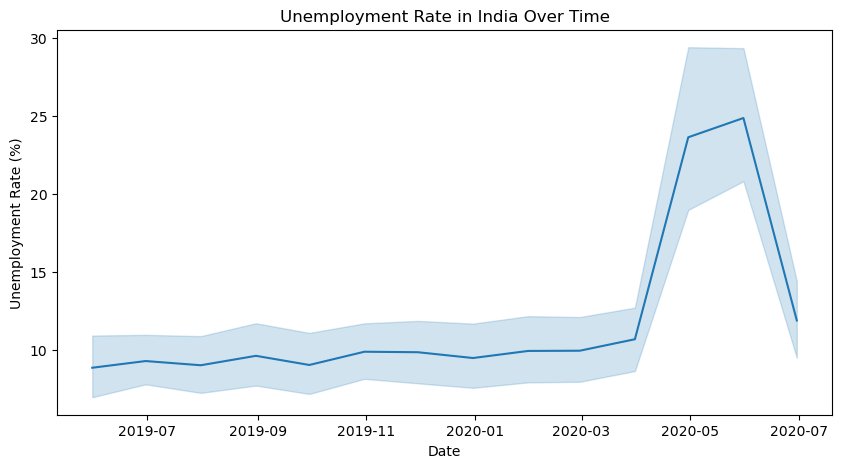

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Estimated_Unemployment_Rate", data=data)
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

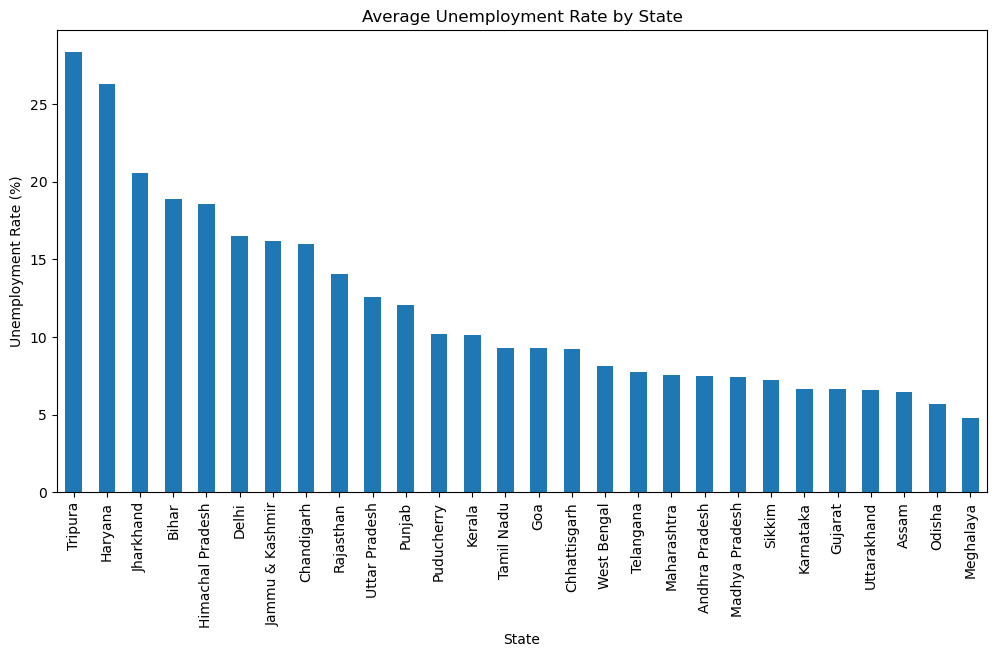

In [12]:
state_avg = data.groupby("State")["Estimated_Unemployment_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_avg.plot(kind="bar")
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.show()

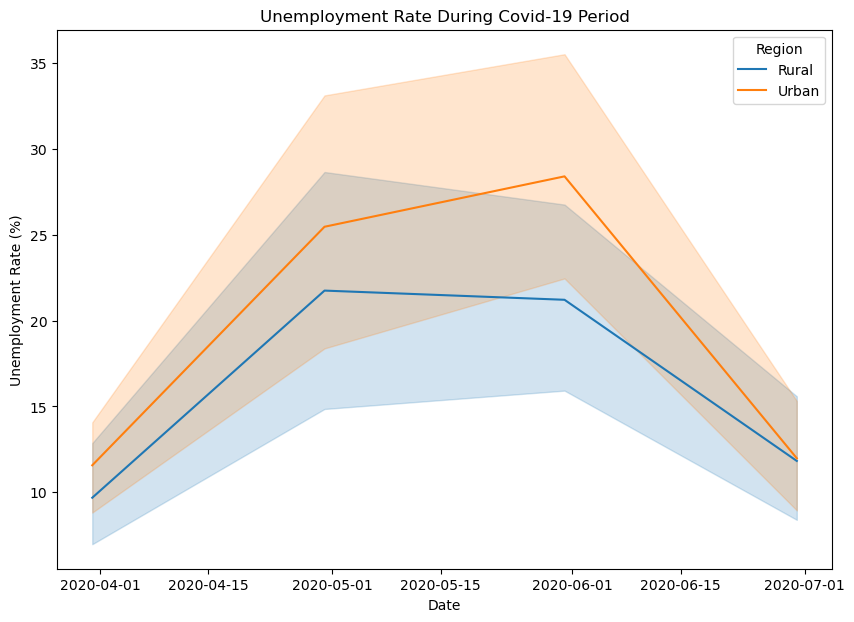

In [15]:
covid_data = data[data["Date"] >= "2020-03-01"]

plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Estimated_Unemployment_Rate", data=covid_data, hue="Region")
plt.title("Unemployment Rate During Covid-19 Period")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

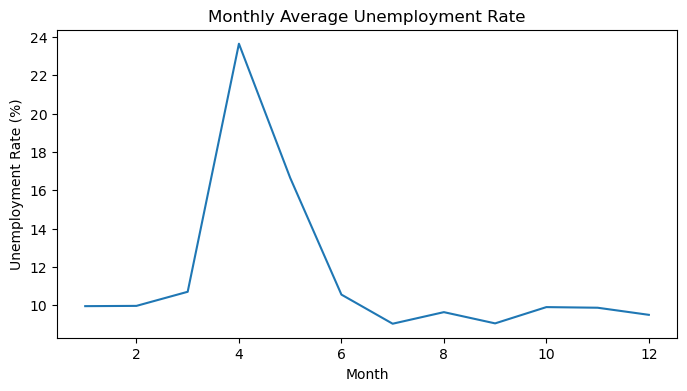

In [14]:
data["Month"] = data["Date"].dt.month

monthly_avg = data.groupby("Month")["Estimated_Unemployment_Rate"].mean()

plt.figure(figsize=(8,4))
monthly_avg.plot()
plt.title("Monthly Average Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()